# Color picker - selecionando as cores

Este *notebook* é parte da resposta da Q1 da prova

A questão pede que identiquemos os cães amarelos ou magentas quando estiverem sobre a cadeira.

Vamos usar a técnica mais direta, que consiste em color pickers.


<img src="dogs_nada.png">

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version : %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

import auxiliar as aux

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(aux) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(aux)


OpenCV Version : 4.1.1 
Este script não deve ser executado diretamente
Este script não deve ser executado diretamente


In [2]:

### Leitura de imagens demo - nada disso precisa ser feito na prova
q1_img_names = "dogs_nada.png  dogs_pink.png  dogs_yellow.png".split()
q1_img = [cv2.imread(filename) for filename in q1_img_names]
hsv_img = [cv2.cvtColor(i, cv2.COLOR_BGR2HSV) for i in q1_img]
rgb_img = [cv2.cvtColor(i, cv2.COLOR_BGR2HSV) for i in q1_img]

def multiplot(imgs, legenda):
    """ Função que plota n imagens BGR em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
        return
    for i in range(len(imgs)):
        axes[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
        
def multiplot_gray(imgs, legenda):
    """ Função que plota n imagens grayscale em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0],  vmin=0, vmax=255, cmap="Greys_r"))
        return
    for i in range(len(imgs)):
        axes[i].imshow(imgs[i], vmin=0, vmax=255, cmap="Greys_r")

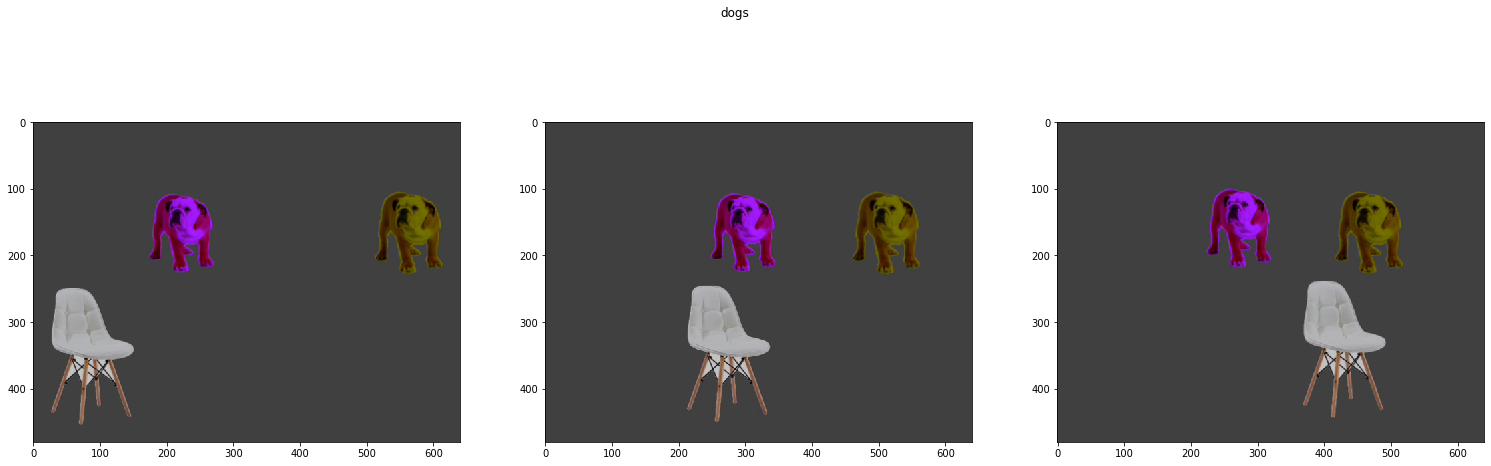

In [3]:
multiplot(q1_img, "dogs")

In [4]:
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#9a15f3',
    disabled=False
)

# Magenta

In [5]:
colorpicker

ColorPicker(value='#9a15f3', description='Escolha uma cor')

In [6]:
hsv1, hsv2 = aux.ranges(colorpicker.value)

In [7]:
from numpy import array, uint8

In [8]:
repr(hsv1)

'array([128,  50,  50], dtype=uint8)'

In [9]:
repr(hsv2)

'array([138, 255, 255], dtype=uint8)'

In [10]:
mask_magenta = [cv2.inRange(img, hsv1, hsv2) for img in hsv_img]

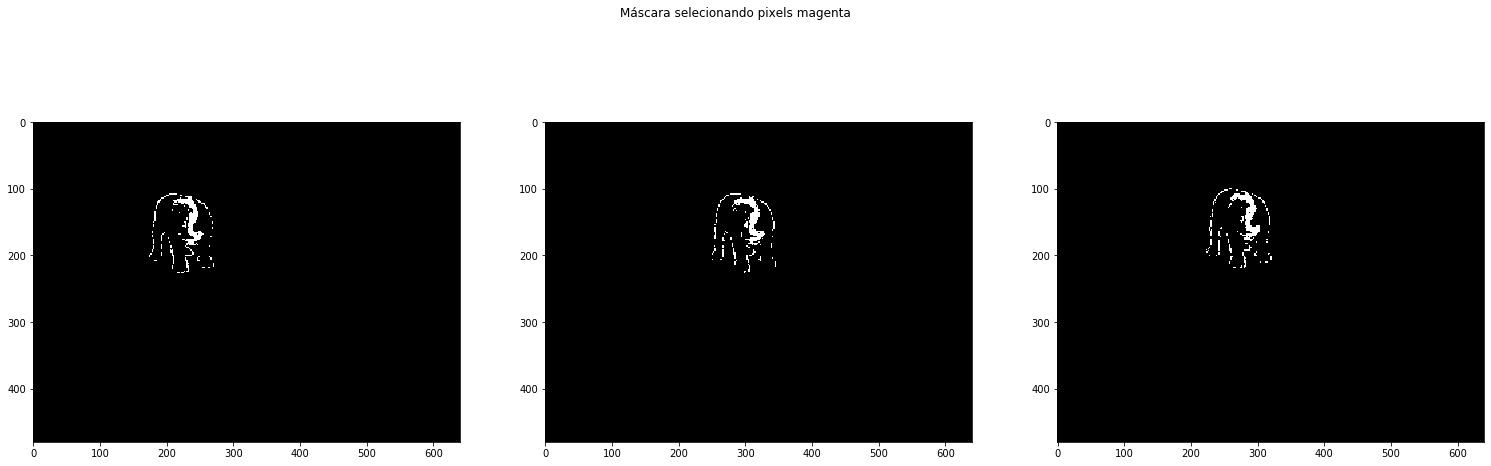

In [11]:
multiplot_gray(mask_magenta, "Máscara selecionando pixels magenta")

# Amarelo

In [12]:
colorpicker2 = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#807c00',
    disabled=False
)

In [13]:
colorpicker2

ColorPicker(value='#807c00', description='Escolha uma cor')

In [14]:
hsv1y, hsv2y = aux.ranges(colorpicker2.value)

In [15]:
from numpy import array, uint8

In [16]:
repr(hsv1y)

'array([19, 50, 50], dtype=uint8)'

In [17]:
repr(hsv2y)

'array([ 29, 255, 255], dtype=uint8)'

In [18]:
mask_yellow = [cv2.inRange(img, hsv1y, hsv2y) for img in hsv_img]

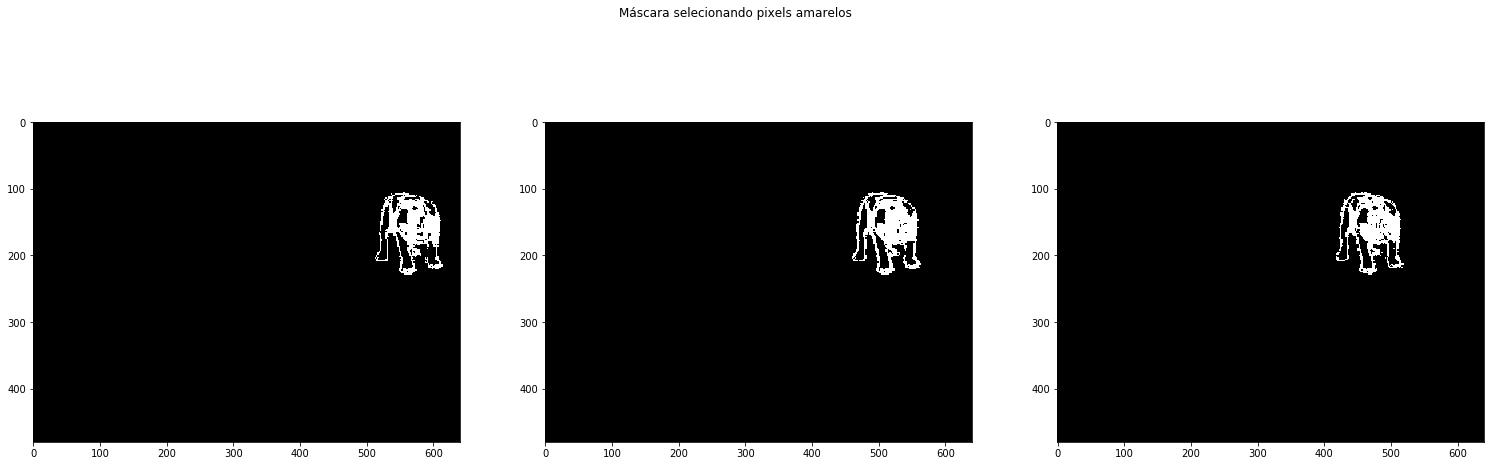

In [19]:
multiplot_gray(mask_yellow, "Máscara selecionando pixels amarelos")

### Considerações importantes

Note que *nenhum* pixel pertence a ambos os cães com nenhuma das máscaras que realizamos. Isso vai ser importante quando formos tentar identificar se um cachorro é magenta ou amarelo.

